<a href="https://colab.research.google.com/github/Nikhil768692/machine_learning/blob/main/Object_detection_by_using_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

Load data

In [6]:
df = pd.read_csv('../content/drive/MyDrive/object detection/yolov8 dataset/labels_train.csv')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
37252,1478896847242201802.jpg,137,218,146,203,1
104853,1479503916319377123.jpg,121,152,142,162,1
115392,1479504785405056071.jpg,48,80,145,185,1
91115,1479502413738452755.jpg,264,273,143,152,1
131242,1479506079988237620.jpg,417,479,127,174,1


In [7]:
classes = df.class_id.unique()
print(classes)

[1 3 2 5 4]


In [8]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

Show some labeled images

In [36]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
image = {}

base_path = '../content/drive/MyDrive/object detection/yolov8 dataset/image'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]

    image[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

In [41]:
for i in classes:

   xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

   plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])
   plt.imshow(image[i])
  plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))

  plt.show()

Model

In [42]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.1/873.1 kB 45.5 MB/s eta 0:00:00


In [43]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [44]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 129MB/s]


In [45]:
results=model.predict(source="/content/1479506173475582156.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 /content/1479506173475582156.jpg: 416x640 11 cars, 120.3ms
Speed: 12.3ms preprocess, 120.3ms inference, 775.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


In [46]:
result = results[0]
box = result.boxes[0]

In [47]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [48]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [359.5216369628906, 145.65760803222656, 479.5013122558594, 200.93316650390625]
Probability: 0.9214790463447571


In [49]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [360, 146, 480, 201]
Probability: 0.92
---
Object type: car
Coordinates: [317, 145, 382, 185]
Probability: 0.89
---
Object type: car
Coordinates: [94, 145, 132, 174]
Probability: 0.82
---
Object type: car
Coordinates: [284, 140, 341, 177]
Probability: 0.81
---
Object type: car
Coordinates: [246, 143, 276, 166]
Probability: 0.74
---
Object type: car
Coordinates: [217, 143, 235, 158]
Probability: 0.74
---
Object type: car
Coordinates: [141, 146, 157, 158]
Probability: 0.73
---
Object type: car
Coordinates: [124, 145, 140, 167]
Probability: 0.6
---
Object type: car
Coordinates: [191, 146, 201, 154]
Probability: 0.24
---
Object type: car
Coordinates: [0, 224, 478, 294]
Probability: 0.23
---
Object type: car
Coordinates: [161, 145, 171, 152]
Probability: 0.2
---


In [50]:
results1 = model.predict(source="/content/1479506173994033498.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 /content/1479506173994033498.jpg: 416x640 9 cars, 27.1ms
Speed: 5.6ms preprocess, 27.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


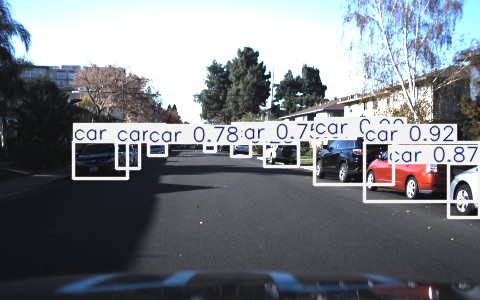

In [51]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))